# Some simple forecasting methods

## Average method
The forecast of all future values are equal to the average of the historical data. If we let the historical data be denoted by $y_1, ...., y_T$, then we can write the forecast as 

$\hat{y}_{T+h|T}=\overline{y}=(y_1+...+y_T)/T$

## Naive method
For naive forecasts, we simply set all forecasts to be the value of the last observation. That is, 

$\hat{y}_{T+h|T}=y_T$

This method works remarkably well for many economic and finanical time series. Because a naive forecast is optimal when data follows a random walk. 

## Seasonal naive method
We set each forecast to be equal to the last observed value from the same season of the year. Formally, the forecast for time $T+h$ is written as 
$\hat{y}_{T+h|T}=y_{T+h-m(k+1)}$
where $m =$ the seasonal period, and $k$ is the integer part of $(h-1)/m$ the number of complete year in the forecast period prior to time $T+h$.

## Drift method
A variation on the naive method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the averge change seen in the historical data. 

$\hat{y}_{T+h|T} = y_T + h(\frac{y_T-y_1}{T-1})$

# Transformations and adjustments
The purpose of these adjustments and transformations is to simplify the patterns in the historical data by removing known sources of variation or by making the pattern more consistent across the whole data set. Simpler patterns usually lead to more accurate forecasts. 

## Calendar adjustments
Some of the variation seen in seasonal data may be due to simple calendar effects. In such cases, it is usually much easier to remove the variation before fitting a forecasting model. 

For example, if you are studying the monthly milk production on a farm, there will be variation between the months simply because of the different number of days in each month. (get a dailay average is much better.)

## Population adjustments
Any data that are affected by population change can be adjusted to give per-capita data. That is, consider the data per person (or per thousand people, or per million people) rather than the total. 

## Inflation adjustments 
Data which are affected by the value of money are best adjusted before modelling. Financial time series are ususally adjusted so that all values are stated in dollar values from a particular year. 


# Mathematical transformations 

## Logarithmic transformation 
If we denote the original observation as $y_1,..., y_T$ and the transformation observations as $w_1, ..., w_T$, then 
$w_t = log(y_t)$

Logarithm are useful because they are interpretable: changes in a log value are relative change on the original scale. Another useful feature of log transformation is that they constrain the forecasts to stay positivfe on the original scale. 

## Box-Cox transformation
which depends on the parameter $\lambda$ and are defined as follows:
\begin{equation}w_t=\begin{cases}
    log(y_t)  & if\  \lambda = 0.\\
    (y_t^\lambda -1)/\lambda, & \text{otherwise}.
  \end{cases}\end{equation}

A good value of $\lambda$ is one which makes the size of the seasonal variation about the same across the whole series, as that makes the forecasting model simpler. 

Having chosen a transformation, we need to forecast the transformed data. Then, we need to reverse the transformation to obtain forecasts on the original scale. 

\begin{equation}y_t=\begin{cases}
    \exp{w_t}  & if\  \lambda = 0.\\
    (\lambda w_t+1)^{1/\lambda}, & \text{otherwise}.
  \end{cases}\end{equation}


# Bias adjustments

# Residual Diagnostic

The "residuals" in a time series model are what is left over after fitting a model. For many (but not all models), the residuals are equal to the difference between the observations and the corresponding fitted values:
$$
    e_t = y_t - \hat{y_t}
$$

A good forecast model will yeild residuals with following properties:
- The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residual which should be used in computing forecast. 
- The residual should have zero mean. Otherwise, the forecast is biased.
- The residual has constant variance. 
- The residual are normally distributed. 

Checking these properties is important to see whether a model is using all of available information, but it is not a good method to select a forecast model. 

We test whether the first h autocorrelations are significantly different from what we expected from a white noise signal. 

## Box-Pierce test
$$
Q = T\sum_{k=1}^{h}{r_k}^2
$$

where h is the maximum lag considered, and T is the number of observation. We suggest h = 10 for non-seasonal, and h = 2*m for seasonal, where m is the peroid of seasonality. If these are larger than T/5, set h = T/5

## Ljung-Box test
$$
Q^* = T(T+2)\sum_{k=1}^h(T-k)^{-1}r_k^2
$$

if autocorrelation did come from a white noise series, that both $Q$ and $Q^*$ would have a $\chi^2$ distribution with (h-K) degrees of freedom, where k is the number of parameters in the model.

# Prediction interval

### why calculate a prediction interval
In predictive modelling, a forecast or a prediction is a single outcome value given some input variables. 
For example:
```python
yhat = model.predict(x)
```
where yhat is the estimated outcome or prediction made by the trained model for the given input data X.
This is point estimation. By defintion, it is an estimate or an approximation with uncertainty. 

The uncertainty comes from the errors of the model itself, and noise in input data. The model is an approximation of the relationship between the input varialbes and the output variables. 

A prediction interval is a quantification of the uncertainty on a prediction. It provides a probabilistic lower and upper bound on the estimate of an outcome variable. 

An example of the presentation of prediction interval is as follows:

>    Given a prediction of 'y' given 'x', there is 95% likelihood that the range of 'a' to 'b' covers the true outcome. 

### Worked example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
np.random.seed(1)
x = 20*np.random.randn(1000)+100
y = x + (10*np.random.randn(1000)+50)
print("x: mean={:.3f}, std={:.3f}".format(np.mean(x), np.std(x)))
print("y: mean={:.3f}, std={:.3f}".format(np.mean(y), np.std(y)))

x: mean=100.776, std=19.620
y: mean=151.050, std=22.358


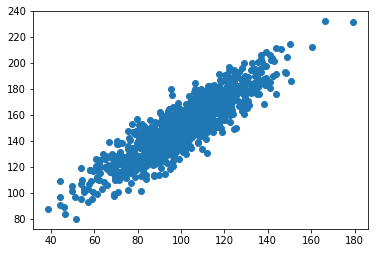

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
# fit a linear regression model 
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(np.reshape(x, (len(x),-1)), np.reshape(y, (len(y),-1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lr.coef_[0][0]

1.0114747108839153

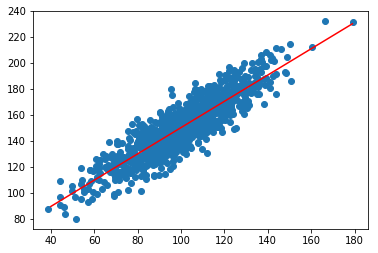

In [38]:
plt.scatter(x,y)
plt.plot(np.arange(40,180), lr.intercept_[0]+lr.coef_[0][0]*np.arange(40,180),'r')

In [40]:
yhat = lr.predict(np.reshape(x, (len(x),-1)))

In [43]:
y = np.reshape(y, (len(y),-1))

In [49]:
sum_errs = np.sum((y-yhat)**2)

In [52]:
stdev = np.sqrt(1.0/(len(x)-2)*sum_errs)

In [54]:
# the 95% prediction interval is 1.96
1.96*stdev

20.204124909477418

### Use bootstrap to compute the confidence interval

In [55]:
import pandas as pd

In [71]:
df = pd.read_csv('./data/pima-indians-diabetes.data.csv', header=None)
values = df.values

In [64]:
n_iteration = 1000
n_size = int(0.5*len(df.values))

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
stats = list()
for i in range(n_iteration):
    train = resample(values,n_samples =n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:, -1])
    predictions = model.predict(test[:,:-1])
    stats.append(accuracy_score(test[:,-1], predictions))

In [84]:
np.percentile(stats,2.5)

0.6439195805155705

In [85]:
np.percentile(stats, 97.5)

0.7317596566523605